**Praktikum 1**

In [47]:
# Persiapan data
import pandas as pd # Library yang berguna dalam analisis data dan manipulasi data tabular
import numpy as np # Library untuk komputasi numerik, termasuk array multidimensional dan berbagai fungsi matematika
import matplotlib.pyplot as plt # Library yang digunakan untuk membuat grafik dan visualisasi data di Python
from sklearn.cluster import KMeans # Library yang digunakan dalam clustering

df = pd.read_csv('data/Iris.csv') # Membaca data dari file CSV dan menyimpannya dalam sebuah DataFrame

df.head() # Menampilkan 5 data teratas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
# Seleksi Fitur

X = df.iloc[:, 1:-1] # digunakan untuk memilih baris dari semua barisdan kolom dari kolom kedua hingga kolom sebelum terakhir sebagai variabel X
y = df.iloc[:, -1] # digunakan untuk mengambil kolom terakhir dari dataframe sebagai variabel target y

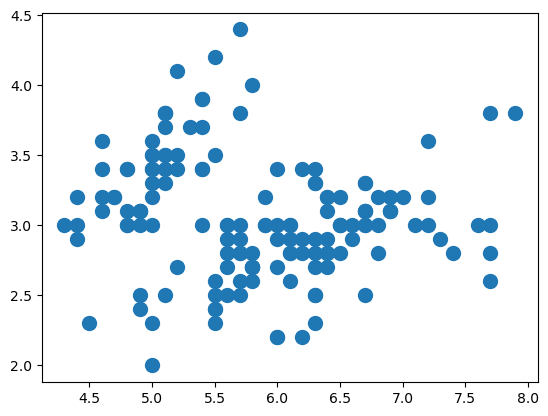

In [49]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100) # digunakan untuk membuat sebuah scatter plot dengan data dari dua kolom pertama dari dataframe X

In [60]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans # Library yang digunakan dalam clustering

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2, n_init=10) # membuat sebuah objek KMeans dengan dua cluster

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X) # melatih model K-Means (cl_kmeans) pada data X dan memprediksi cluster ke mana setiap data akan termasuk

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


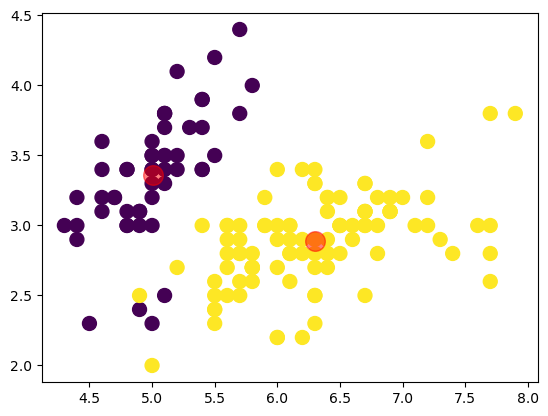

In [61]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans) # membuat scatter plot dari data yang dikelompokkan ke dalam cluster oleh algoritma K-Means

# Plot centroid
centers = cl_kmeans.cluster_centers_ # mengambil koordinat pusat dari masing-masing klaster setelah proses klastering selesai
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5) # menampilkan titik-titik pusat klaster dalam plot

In [62]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}') # Menampilkan nilai SSE

Nilai SSE: 152.36870647733906


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

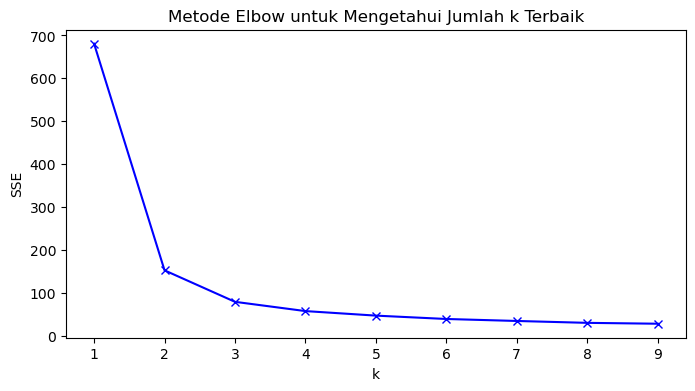

In [63]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k, n_init=10)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [64]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244
k=2; SSE=152.36870647733906
k=3; SSE=78.94084142614602
k=4; SSE=57.34492380952382
k=5; SSE=46.7821
k=6; SSE=38.930963049671746
k=7; SSE=34.318944283786394
k=8; SSE=29.914633449883453
k=9; SSE=27.888669059011168
